# Dummy variables or how to deal with categorical predictors

## Import the relevant libraries

# Testing

Data Preview:
     SaleID RetailerCountry OrderMethod   RetailerType           ProductLine  \
0  SaleID_1   United States         Fax  Outdoors Shop  Personal Accessories   
1  SaleID_2   United States         Fax  Outdoors Shop      Sports Equipment   
2  SaleID_3   United States         Fax  Outdoors Shop                   NaN   
3  SaleID_4   United States         Fax  Outdoors Shop                   NaN   
4  SaleID_5   United States         NaN  Outdoors Shop  Personal Accessories   

    ProductType                    Product    Year  Quarter   Revenue  \
0  Cooking Gear  TrailChef Deluxe Cook Set  2018.0  Q1 2018  59728.66   
1  Cooking Gear     TrailChef Double Flame  2018.0  Q1 2018  36050.32   
2         Tents                  Star Dome  2018.0  Q1 2018  90040.48   
3         Tents               Star Gazer 2  2018.0  Q1 2018       NaN   
4     First Aid         Compact Relief Kit  2018.0  Q1 2018       NaN   

   Quantity  GrossMargin  
0     491.0     0.357548  
1     254.0 

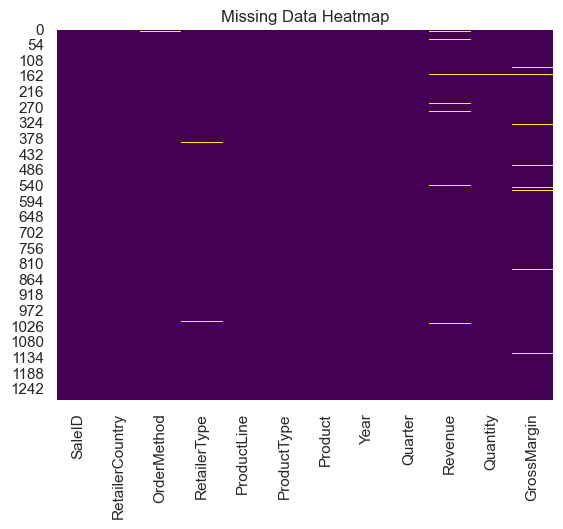


Duplicate Rows:
Empty DataFrame
Columns: [SaleID, RetailerCountry, OrderMethod, RetailerType, ProductLine, ProductType, Product, Year, Quarter, Revenue, Quantity, GrossMargin]
Index: []

Data after removing duplicates:
(1276, 12)


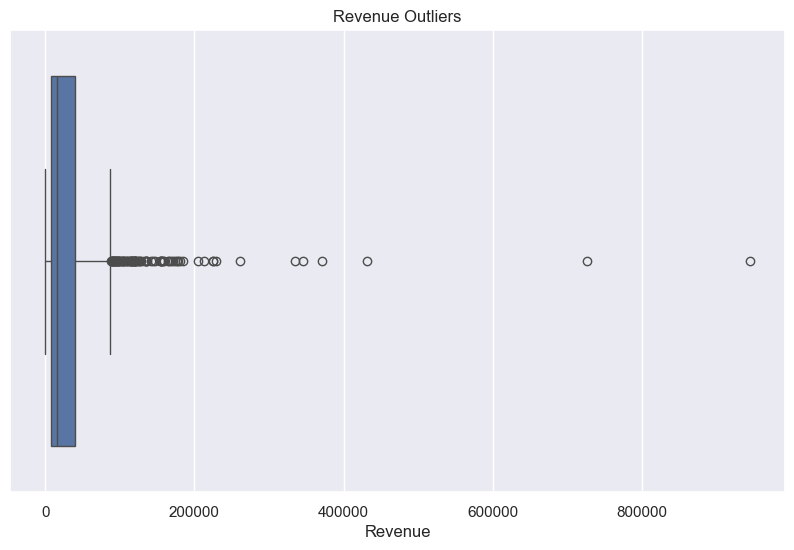


Data after outlier removal:
(1190, 12)

Data after row deletion:
(1139, 12)

Data after column deletion:
(1190, 3)

Data after imputation:
     SaleID RetailerCountry OrderMethod   RetailerType           ProductLine  \
0  SaleID_1   United States         Fax  Outdoors Shop  Personal Accessories   
1  SaleID_2   United States         Fax  Outdoors Shop      Sports Equipment   
3  SaleID_4   United States         Fax  Outdoors Shop  Personal Accessories   
4  SaleID_5   United States         NaN  Outdoors Shop  Personal Accessories   
5  SaleID_6   United States         Fax  Outdoors Shop     Camping Equipment   

    ProductType                    Product    Year  Quarter      Revenue  \
0  Cooking Gear  TrailChef Deluxe Cook Set  2018.0  Q1 2018  59728.66000   
1  Cooking Gear     TrailChef Double Flame  2018.0  Q1 2018  36050.32000   
3         Tents               Star Gazer 2  2018.0  Q1 2018  22127.33362   
4     First Aid         Compact Relief Kit  2018.0  Q1 2018  22127.33362   

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [16]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# We can override the default matplotlib styles with those of Seaborn
sns.set()

# Load the dataset
raw_data = pd.read_csv('Sales-products.csv')

# Display the first few rows of the dataset
print("Data Preview:")
print(raw_data.head())

# 1. Descriptive statistics using describe()
print("\nDescriptive Statistics:")
print(raw_data.describe())

# 2. Handling Missing Values
# Checking missing values
print("\nMissing Values Count:")
print(raw_data.isnull().sum())

# Visualizing missing data
sns.heatmap(raw_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

# 3. Handling Duplicates
# Checking for duplicate rows
print("\nDuplicate Rows:")
duplicates = raw_data[raw_data.duplicated()]
print(duplicates)

# Removing duplicate rows
raw_data = raw_data.drop_duplicates()
print("\nData after removing duplicates:")
print(raw_data.shape)

# 4. Handling Outliers
# Visualizing outliers in Revenue column using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=raw_data['Revenue'])
plt.title('Revenue Outliers')
plt.show()

# Removing outliers using the IQR method
Q1 = raw_data['Revenue'].quantile(0.25)
Q3 = raw_data['Revenue'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (raw_data['Revenue'] < (Q1 - 1.5 * IQR)) | (raw_data['Revenue'] > (Q3 + 1.5 * IQR))

# Dropping rows where outliers are present in the Revenue column
raw_data = raw_data[~outlier_condition]
print("\nData after outlier removal:")
print(raw_data.shape)

# 5. Handling Missing Values - Different Imputation Methods

# a) Row Deletion (Removing rows with missing values)
row_deleted_data = raw_data.dropna()
print("\nData after row deletion:")
print(row_deleted_data.shape)

# b) Column Deletion (Removing columns with missing values)
col_deleted_data = raw_data.dropna(axis=1)
print("\nData after column deletion:")
print(col_deleted_data.shape)

# c) Mean Imputation
imputer_mean = SimpleImputer(strategy='mean')
raw_data['Revenue'] = imputer_mean.fit_transform(raw_data[['Revenue']])

# d) Median Imputation
imputer_median = SimpleImputer(strategy='median')
raw_data['Quantity'] = imputer_median.fit_transform(raw_data[['Quantity']])

# e) Mode Imputation
imputer_mode = SimpleImputer(strategy='most_frequent')
raw_data['ProductLine'] = imputer_mode.fit_transform(raw_data[['ProductLine']]).ravel()

print("\nData after imputation:")
print(raw_data.head())

# 6. Handling Inconsistent Formats
# Converting 'Year' to integer format (if it contains float values)
raw_data['Year'] = raw_data['Year'].astype(int)

# 7. Exploratory Data Analysis (EDA) - Assessing Data Quality
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(raw_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Revenue distribution
plt.figure(figsize=(10, 6))
sns.histplot(raw_data['Revenue'], bins=30, kde=True)
plt.title('Revenue Distribution')
plt.show()

# 8. Handling Duplicates and Redundant Data
# Checking for duplicates again after cleaning
print("\nDuplicate Rows after cleaning:")
duplicates = raw_data[raw_data.duplicated()]
print(duplicates)

# 9. Imputation: Multiple Imputation using MICE (Multiple Imputation by Chained Equations)
# Using statsmodels library for MICE
from statsmodels.imputation.mice import MICEData
mice_data = MICEData(raw_data)
imputed_data = mice_data.data

print("\nData after MICE Imputation:")
print(imputed_data.head())

# Saving the cleaned data
imputed_data.to_csv('cleaned_sales_data.csv', index=False)

print("Data cleaning and preprocessing complete!")


In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# We can override the default matplotlib styles with those of Seaborn
sns.set()

## Load the data

In [14]:
raw_data = pd.read_csv('Sales-products.csv')
raw_data

,SaleID,RetailerCountry,OrderMethod,RetailerType,ProductLine,ProductType,Product,Year,Quarter,Revenue,Quantity,GrossMargin
0,SaleID_1,United States,Fax,Outdoors Shop,Personal Accessories,Cooking Gear,TrailChef Deluxe Cook Set,2018.0,Q1 2018,59728.66,491.0,0.357548
1,SaleID_2,United States,Fax,Outdoors Shop,Sports Equipment,Cooking Gear,TrailChef Double Flame,2018.0,Q1 2018,36050.32,254.0,0.484274
2,SaleID_3,United States,Fax,Outdoors Shop,NaN,Tents,Star Dome,2018.0,Q1 2018,90040.48,149.0,NaN
3,SaleID_4,United States,Fax,Outdoors Shop,NaN,Tents,Star Gazer 2,2018.0,Q1 2018,NaN,305.0,0.292938
4,SaleID_5,United States,NaN,Outdoors Shop,Personal Accessories,First Aid,Compact Relief Kit,2018.0,Q1 2018,NaN,182.0,0.610710
...,...,...,...,...,...,...,...,...,...,...,...,...
1271,SaleID_1272,Spain,Sales visit,Outdoors Shop,Personal Accessories,Rope,Husky Rope 60,2020.0,Q3 2020,30916.50,173.0,0.298114
1272,SaleID_1273,Spain,Sales visit,Outdoors Shop,Outdoor Protection,Climbing Accessories,Firefly Climbing Lamp,2020.0,Q3 2020,7536.29,193.0,0.445287
1273,SaleID_1274,Spain,Sales visit,Outdoors Shop,Personal Accessories,Climbing Accessories,Firefly Charger,2020.0,Q3 2020,12306.48,238.0,0.568420
1274,SaleID_1275,Spain,Sales visit,Outdoors Shop,Personal Accessories,Tools,Granite Axe,2020.0,Q3 2020,56499.00,1472.0,0.490667


## Map the data

In [11]:

data = raw_data.copy()
data['Status'] = data['Status'].map({'Alive': 1, 'Dead': 0})
data

KeyError: 'Status'

In [ ]:
data['Race'] = data['Race'].map({'White': 1, 'Black': 0, 'Other':  2})

In [ ]:
# This method gives us very nice descriptive statistics.
data.describe()

,Age,Race,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,1.007207,30.473658,14.357107,4.158052,71.297962,0.846918
std,8.963134,0.389647,21.119696,8.099675,5.109331,22.921430,0.360111
min,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,47.000000,1.000000,16.000000,9.000000,1.000000,56.000000,1.000000
50%,54.000000,1.000000,25.000000,14.000000,2.000000,73.000000,1.000000
75%,61.000000,1.000000,38.000000,19.000000,5.000000,90.000000,1.000000
max,69.000000,2.000000,140.000000,61.000000,46.000000,107.000000,1.000000


## Regression

In [ ]:
y = data ['Survival Months']
x1 = data [['Tumor Size','Race']]

In [ ]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Survival Months   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     21.60
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           4.65e-10
Time:                        15:19:07   Log-Likelihood:                -18291.
No. Observations:                4024   AIC:                         3.659e+04
Df Residuals:                    4021   BIC:                         3.661e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.8927      1.121     63.213      0.000      68.694      73.091
Tumor Size    -0.0946      0.017     -5.556      0.000      -0.128      -0.061
Race           3.2644      0.923      3.538      0.000       1.455       5.073
==============================================================================
Omnibus:                      191.132   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              218.833
Skew:                          -0.571   Prob(JB):                     3.03e-48
Kurtosis:                       3.014   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Plot the regression line(s) on the scatter plot

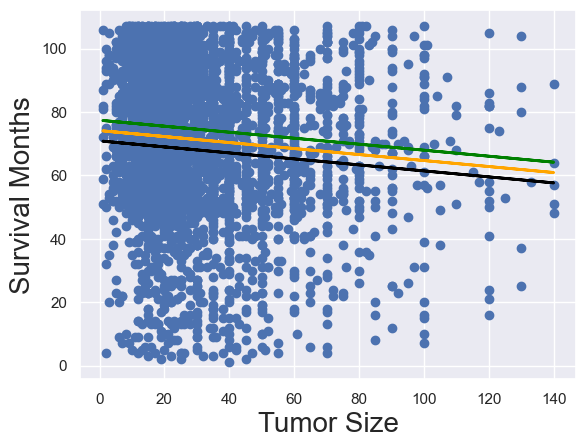

In [ ]:

plt.scatter(data['Tumor Size'],y)

#race = 0 black
yhat_b = 70.8927 + -0.0946*data['Tumor Size'] + -3.2644*0

#race = 1 white
yhat_w = 70.8927 + -0.0946*data['Tumor Size'] + 3.2644*1

#race = 2 other
yhat_o = 70.8927 + -0.0946*data['Tumor Size'] + 3.2644*2


fig = plt.plot(data['Tumor Size'],yhat_b, lw=2, c='black')
fig = plt.plot(data['Tumor Size'],yhat_w, lw=2, c='orange')
fig = plt.plot(data['Tumor Size'],yhat_o, lw=2, c='green')


plt.xlabel('Tumor Size', fontsize = 20)
plt.ylabel('Survival Months', fontsize = 20)
plt.show()

## Plot the regression line(s) on the scatter plot and color the data points

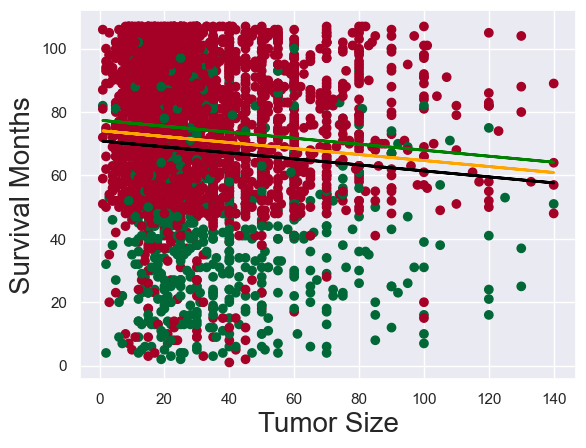

In [ ]:

plt.scatter(data['Tumor Size'],data['Survival Months'], c=data['Status'],cmap='RdYlGn_r')



#race = 0 black
yhat_b = 70.8927 + -0.0946*data['Tumor Size'] + -3.2644*0

#race = 1 white
yhat_w = 70.8927 + -0.0946*data['Tumor Size'] + 3.2644*1

#race = 2 other
yhat_o = 70.8927 + -0.0946*data['Tumor Size'] + 3.2644*2



fig = plt.plot(data['Tumor Size'],yhat_b, lw=2, c='black')
fig = plt.plot(data['Tumor Size'],yhat_w, lw=2, c='orange')
fig = plt.plot(data['Tumor Size'],yhat_o, lw=2, c='green')


plt.xlabel('Tumor Size', fontsize = 20)
plt.ylabel('Survival Months', fontsize = 20)
plt.show()

In [ ]:
x

,const,Tumor Size,Race
0,1.0,4,1
1,1.0,35,1
2,1.0,63,1
3,1.0,18,1
4,1.0,41,1
...,...,...,...
4019,1.0,9,2
4020,1.0,46,1
4021,1.0,22,1
4022,1.0,44,0


In [ ]:
new_data = pd.DataFrame({'const': 1,'Tumor Size': 35 , 'Race': [2]})
new_data = new_data[['const','Tumor Size','Race']]
new_data
new_data.rename(index={0: 'Tumor Size',1:'Race'})

,const,Tumor Size,Race
Tumor Size,1,35,2


In [ ]:
predictions = results.predict(new_data)
predictions

0    74.110658
dtype: float64

In [ ]:
predictionsdf = pd.DataFrame({'Predictions':predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0: 'Tumor Size',1:'Race'})


,const,Tumor Size,Race,Predictions
Tumor Size,1,35,2,74.110658


In conclusion, we observe that Asian(race: other) that has Tumor Size 35 has 74.110658 survival months to be alive.